In [0]:
!pip install torch torchvision

    100% |████████████████████████████████| 591.8MB 25kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x62506000 @  0x7f1e8eac62a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
    100% |████████████████████████████████| 61kB 25.3MB/s 
    100% |████████████████████████████████| 2.0MB 7.3MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
  [PIL]
You must restart the runtime in order to use newly installed versions.


In [0]:
# Load zip from Google Drive
from google.colab import drive
drive.mount('/content/gdrive')
!unzip gdrive/My\ Drive/data_semantics.zip

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [0]:
def model():
    # Intial Block
    
    # Stage 1
    
    # Stage 2
    
    # Stage 3
    
    # Stage 4
    
    # Stage 5
    
    return model

In [0]:
DS = 'downsampling'
AS = 'asymetric'
D = 'Dilated'
R = 'regular'

In [0]:
class ENet(nn.Module):
    
    def __init__(self):
        
        self.i_conv = nn.Conv2d(in_channels = 3, 
                                out_channels = 13, 
                                kernel_size = 3,
                                stride = 2,
                                bias = True)
        
        self.i_maxpool = nn.MaxPool2d(kernel_size=2,
                                      stride = None, # and thus stride = 2, which makes it non-overlapping
                                      padding = 0)
        
        
        self.dropout_001 = nn.Dropout2d(p=0.01)
        self.dropout_01 = nn.Dropout2d(p=0.1)
        
        ########### B 1.0  ####################
        
        self.conv1_1_0, self.prelu1_1_0, self.conv2_1_0, \
        self.prelu2_1_0, self.conv3_1_0, self.maxpool1 = self.bottleneck(stage = 1, 
                                                                         position = 0, 
                                                                         flag = DS)
        
        ########### B 1.1  ####################
        
        self.conv1_1_1, self.prelu1_1_1, self.conv2_1_1, \
        self.prelu2_1_1, self.conv3_1_1 = self.bottleneck(stage = 1, 
                                                          position = 0, 
                                                          flag = R)
        
        ########### B 1.2  ####################
        
        self.conv1_1_2, self.prelu1_1_2, self.conv2_1_2, \
        self.prelu2_1_2, self.conv3_1_2 = self.bottleneck(stage = 1, 
                                                          position = 0, 
                                                          flag = R)
        
        ########### B 1.3  ####################
        
        self.conv1_1_3, self.prelu1_1_3, self.conv2_1_3, \
        self.prelu2_1_3, self.conv3_1_3 = self.bottleneck(stage = 1, 
                                                          position = 0, 
                                                          flag = R)
        
        ########### B 1.4  ####################
        
        self.conv1_1_4, self.prelu1_1_4, self.conv2_1_4, \
        self.prelu2_1_4, self.conv3_1_4 = self.bottleneck(stage = 1, 
                                                          position = 0, 
                                                          flag = R)
        
        #######################################
        
        ########### B 2.0  ####################
        
        
        #######################################
        
        
        ########### B 3.0  ####################
        
        
        #######################################
        
        
        ########### B 4.0  ####################
        
        
        #######################################
        
        ########### B 5.0  ####################
        
        
        #######################################
        
    def forward(self, x):
        
        x_copy = x.clone()
        
        ### Initial Block ###
        x1 = self.i_conv(x)
        x2 = self.i_maxpool(x)
        x = torch.cat((x1, x2), 0)
        
        ### Stage 1 ###
        ## BottleNeck 1.0 ##
        # Main Branch
        x1 = self.maxpool_1_0(x)
        # Side Branch
        x2 = self.conv1_1_0(x)
        x2 = self.batchnorm_1_0(x2)
        x2 = self.prelu1_1_0(x2)
        
        x2 = self.conv2_1_0(x2)
        x2 = self.batchnorm_1_0(x2)
        x2 = self.prelu2_1_0(x2)
        
        x2 = self.conv3_1_0(x2)
        
        x2  = self.dropout_001(x2)
            
        # Concatenate
        x = torch.cat((x1, x2), 0)
        x = self.prelu_1_0(x)
        
        ## BottleNeck 1.1 ##
        
        ### Stage 2 ###
        
    
    def bottleneck(self, stage, position, flag='regular'):
        in_channels = 0
        out_channels = 0
        
        kernel1 = 1
        kernel2 = 3
        kernel3 = 1
        
        stride1 = 1
        
        prob = 0.1
        
        hw = 64
        
        if stage == 1:
            in_channels = 16
            out_channels = 64
            prob = 0.01
            hw = 128
        elif stage == 2:
            in_channels = 64
            out_channels = 128
        elif stage == 3:
            in_channels = 128
            out_channels = 128
        elif stage == 4:
            in_channels = 128
            out_channels = 64
            hw = 128
        elif stage == 5:
            in_channels = 64
            out_channels = 16
            hw = 256
            
        if flag == DS:
            kernel1 = 2
            stride1 = 2
            
        
        # Side branch
        conv1 = nn.Conv2d(in_channels = in_channels,
                       out_channels = out_channels,
                       kernel_size = kernel1,
                       stride = stride1,
                       padding = 0,
                       bias = False)
        
        prelu1 = nn.PReLU()
        
        conv2 = nn.Conv2d(in_channels = out_channels,
                          out_channels = out_channels,
                          kernel_size = kernel2,
                          stride = 1,
                          padding = 1,
                          bias = True)
        
        prelu2 = nn.PReLU()
        
        conv3 = nn.Conv2d(in_channels = out_channels,
                          out_channels = out_channels,
                          kernel_size = kernel3,
                          stride = 1,
                          padding = 0,
                          bias = False)
        
        # Main Branch
        
        if (flag == DS):
            max1 = nn.MaxPool2d(kernel_size = 2,
                                  stride = 2,
                                  padding = 0)
            return conv1, prelu1, conv2, prelu2, conv3, max1
        
        #extras = torch.zeros((, hw, hw))
        
        return conv1, prelu1, conv2, prelu2, conv3

In [0]:
np.random.rand()
x1 = torch.tensor([1, 2, 3])
torch.zeros_like(x1)

tensor([0, 0, 0])

In [0]:

x1 = np.random.randn(13, 3, 32)
x2 = np.random.randn(3, 3, 32)
x3 = torch.cat((torch.from_numpy(x1), torch.from_numpy(x2)), 0)

In [0]:
print (x1.shape)
print (x2.shape)

(13, 3, 32)
(3, 3, 32)


In [0]:
print (x3.shape)

torch.Size([16, 3, 32])


In [0]:
import numpy as np

In [0]:
import cv2
def creat_mask(img,color_map):
  mask = []
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  for i in color_map:
    for j in range(3):
      color_img = np.ones_like(img) * i[j]
      plt.imshow(color_img)
      
    #mask.append(cv2.bitwise_and(img,color_img,i))
  return np.array(mask)

In [0]:
color_img = []
for i in color_map:
  for j in range(3):
    color_img.append(np.ones((512,512)) * i[j])
      #plt.imshow(color_img)

In [0]:
np.array( color_img).shape
plt.imshow(np.array(color_img[:3,:,:]))

TypeError: ignored

In [0]:
import matplotlib.pyplot as plt

In [0]:
color_map = [
    (128, 64,128),
    (0, 0, 0),
    (244, 35,232),
    ( 0, 0,142)
]

In [0]:
a = creat_mask(simg, color_map=color_map)

In [0]:
a.shape

(4, 375, 1242, 3)

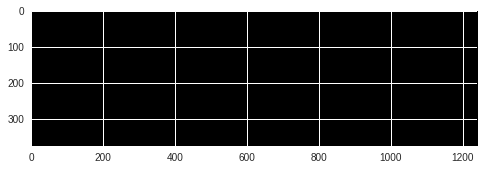

In [0]:
plt.imshow(a[3, :, :, :])

In [0]:
a[3 :, :, :].sum()

2.8420357e-31

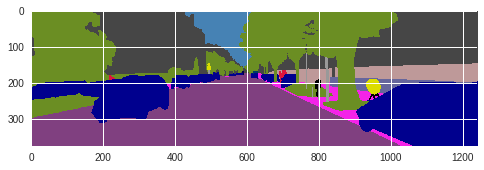

In [0]:
plt.imshow(simg)